# Time-Series Revenue Forecasting Analysis

---
## Project Overview

Retail businesses operate in an environment where demand shifts over time due to seasonality and broader economic conditions. Without reliable forecasts, planning inventory, staffing, and budgets becomes inefficient and risky.

This project analyzes historical retail sales data to translate past demand patterns into forward-looking insights that support practical business decisions. The objective is to **forecast long-term retail sales** to support inventory planning and promotional strategy.

Key focus areas:
- **Identifying long-term trends** and recurring seasonal patterns
- **Forecasting future retail sales** using an interpretable time-series model
- **Providing business-oriented insights** rather than model-heavy optimization

### Dataset
U.S. Retail and Food Services Sales  
 
### Tools
Python, pandas, matplotlib, statsmodels (ARIMA)

## Imports and Dataset Loading

---

This section sets up the Python environment and loads the retail sales dataset into memory.  
The required libraries are imported, and the dataset is fetched directly from its public source to ensure reproducibility.

In [66]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

plt.style.use("seaborn-v0_8")

In [67]:
url = "https://fred.stlouisfed.org/graph/fredgraph.csv?id=RSAFS"
df = pd.read_csv(url)

df.head()

,observation_date,RSAFS
0,1992-01-01,159177
1,1992-02-01,159189
2,1992-03-01,158647
3,1992-04-01,159921
4,1992-05-01,160471


## Dataset Overview

---

The dataset contains **monthly U.S. retail and food services sales data** published by the Federal Reserve Economic Data (FRED).

Each row represents total national retail sales for a specific month, measured in millions of dollars. The dataset spans multiple decades, providing sufficient historical depth to analyze long-term trends, seasonal patterns, and demand fluctuations.

This data is commonly used in economic and business analysis and is **well-suited for time-series forecasting** due to its consistent monthly frequency and single target variable.

## Data Preparation and Validation

---

Before analysis, the dataset is checked for correct date formatting, missing values, and consistent monthly frequency to ensure it is suitable for time-series forecasting.

In [68]:
# =========================
# Data Preparation and Validation
# =========================

# inspect structure and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   observation_date  406 non-null    object
 1   RSAFS             406 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 6.5+ KB


In [69]:
# rename date and sales columns
df["observation_date"] = pd.to_datetime(df["observation_date"])
df = df.rename(columns={"RSAFS": "sales"})

# sort data chronologically
df = df.sort_values("observation_date")

# set date as index
df = df.set_index("observation_date")

# check for missing values
df.isna().sum()

# enforce monthly frequency
df = df.asfreq("MS")

## Exploratory Time Series Analysis

---

This section explores historical retail sales behavior to **identify long-term trends, recurring seasonal patterns, and notable fluctuations** that may **influence forecasting and planning decisions.**

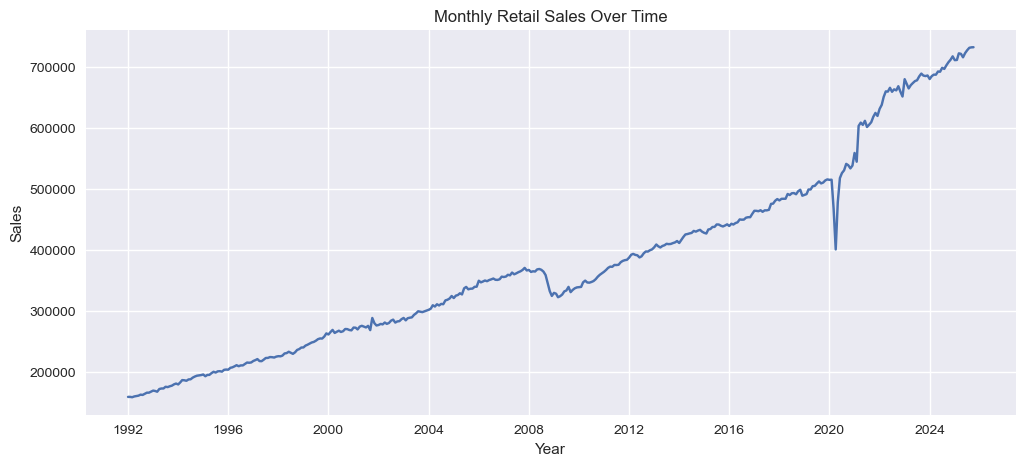

In [70]:
# =========================
# Exploratory Time Series Analysis
# =========================

# plot retail sales over time
plt.figure(figsize=(12, 5))
plt.plot(df.index, df["sales"])
plt.title("Monthly Retail Sales Over Time")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.show()

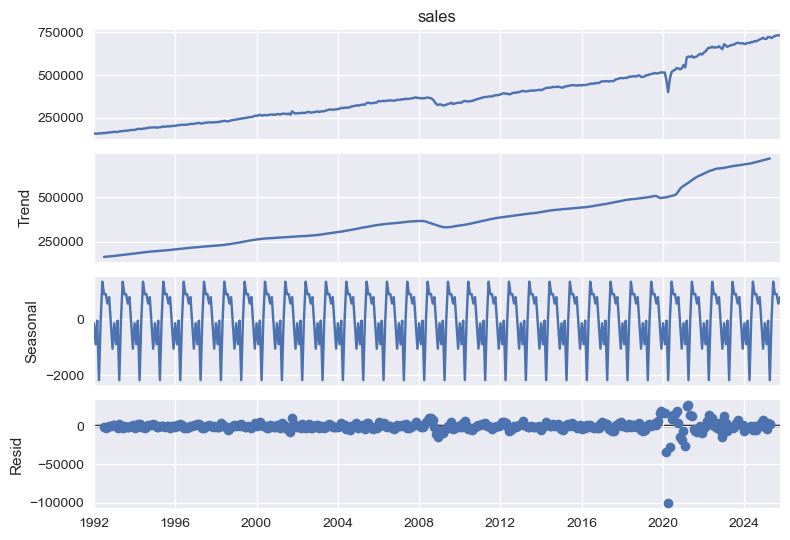

In [71]:
# =========================
# Seasonal Decomposition
# =========================

decomposition = seasonal_decompose(df["sales"], model="additive", period=12)
decomposition.plot()
plt.show()

## Key Insights

**Retail sales** exhibit a strong **long-term upward trend**, indicating sustained growth over time, interrupted by **sharp declines during major economic shocks** such as the 2008 financial crisis and the 2020 pandemic. **Seasonal decomposition** reveals a **stable, recurring annual pattern**, while residuals show increased volatility during disruption periods, suggesting external events temporarily override normal demand behavior.

## Baseline Forecast

---

Before applying a formal forecasting model, a simple baseline forecast is established. This provides a reference point to evaluate whether more advanced methods add meaningful value beyond naive assumptions.

In [72]:
# =========================
# Baseline Forecast
# =========================

# create a naive baseline using the previous month's sales
baseline_forecast = df["sales"].shift(1)

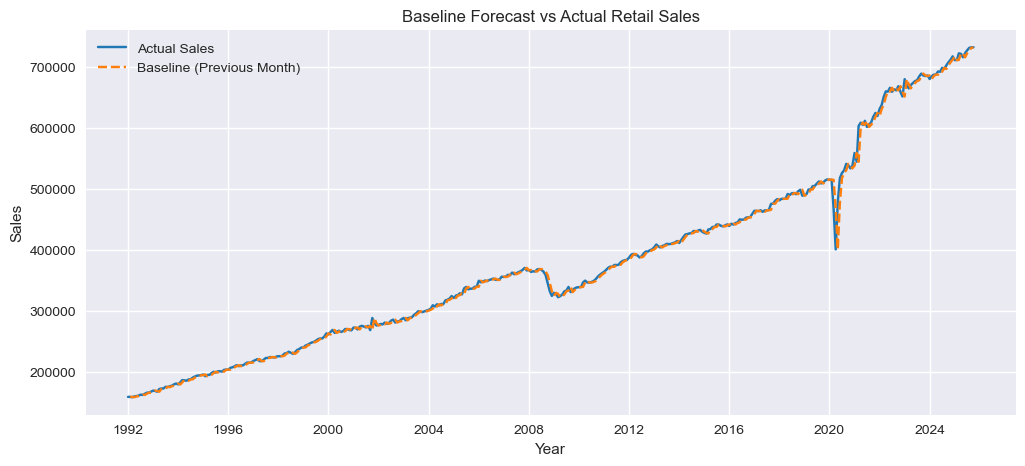

In [84]:
# Visualize baseline forecast vs actual values
plt.figure(figsize=(12, 5))
plt.plot(df.index, df["sales"], label="Actual Sales", color="tab:blue")
plt.plot(df.index, baseline_forecast, label="Baseline (Previous Month)",
         linestyle="--", color="tab:orange")
plt.legend()
plt.title("Baseline Forecast vs Actual Retail Sales")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.show()

## Key Insights

The baseline forecast closely **overlaps with actual sales**, indicating that **short-term movements are highly persistent from month to month**. While this naive approach captures immediate continuity, it fails to account for longer-term trend shifts and seasonal dynamics, highlighting the need for a more structured time-series model to support planning decisions.

## Stationarity Check and Differencing

---

Before forecasting, it is crucial to understand whether retail sales follow a stable pattern over time. **This step checks for long-term drift and prepares the data so future predictions are more reliable.**

In [74]:
# =========================
# Stationarity Check
# =========================

# Augmented Dickey-Fuller test
adf_result = adfuller(df["sales"])

print(f"ADF Statistic: {adf_result[0]:.3f}")
print(f"p-value: {adf_result[1]:.3f}")

ADF Statistic: 1.541
p-value: 0.998


In [75]:
# =========================
# Differencing
# =========================

# apply first-order differencing
df_diff = df["sales"].diff().dropna()

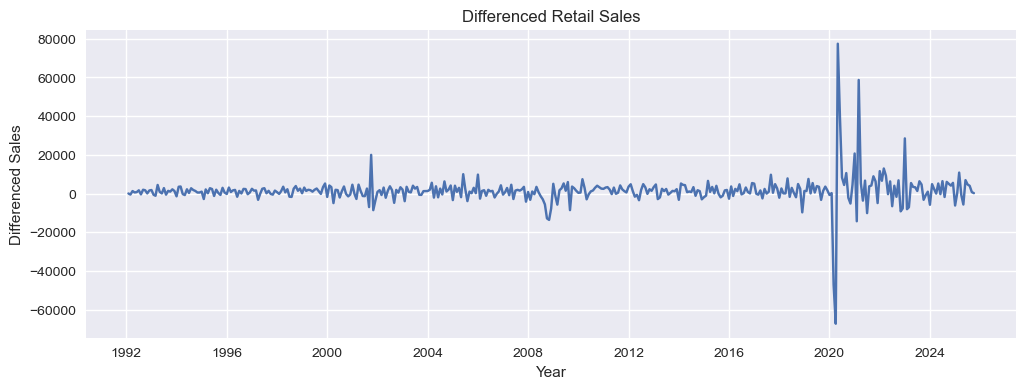

In [76]:
# visualize differenced series
plt.figure(figsize=(12, 4))
plt.plot(df_diff)
plt.title("Differenced Retail Sales")
plt.xlabel("Year")
plt.ylabel("Differenced Sales")
plt.show()

## Observation

**Retail sales year-over-year numbers stayed pretty steady** and close to zero before 2020—showing that sales had a smooth, reliable growth pattern. But starting in 2020, things changed a lot: **a big drop during COVID**, then a **huge jump as the economy bounced back**, and bigger ups and downs ever since. This means **retail sales are now more unpredictable**. The usual model adjustments may not be enough, so it is crucial to be careful with forecasts in this new, more volatile environment.

## ARIMA Model Training

---

With the data prepared, a forecasting model is applied to capture long-term direction and recurring seasonal patterns in retail sales, allowing future demand to be estimated more reliably.

In [77]:
# =========================
# ARIMA Model Training
# =========================

# fit ARIMA model
model = ARIMA(df["sales"], order=(1, 1, 1))
model_fit = model.fit()

In [78]:
# review model summary
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  sales   No. Observations:                  406
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4204.474
Date:                Wed, 24 Dec 2025   AIC                           8414.947
Time:                        17:37:00   BIC                           8426.959
Sample:                    01-01-1992   HQIC                          8419.702
                         - 10-01-2025                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6215      0.244     -2.550      0.011      -1.099      -0.144
ma.L1          0.6695      0.245      2.731      0.006       0.189       1.150
sigma2      6.181e+07   4.41e-08    1.4e+15      0.000    6.18e+07    6.18e+07
===================================================================================
Ljung-Box (L1) (Q):                   1.12   Jarque-Bera (JB):             43471.21
Prob(Q):                              0.29   Prob(JB):                         0.00
Heteroskedasticity (H):              17.48   Skew:                             1.75
Prob(H) (two-sided):                  0.00   Kurtosis:                        53.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.71e+30. Standard errors may be unstable.
"""

## Key Insights

The trained ARIMA model nicely captures the steady growth and usual ups-and-downs in retail sales. It works well for normal times. However, the wild swings during and after COVID make the model's predictions less certain. The forecast gives a good sense of direction, but we should plan with extra caution and keep some buffer stock, especially when things feel unpredictable.

Model diagnostics indicate some parameter uncertainty, which is common in long-term economic time series. This does not affect the overall trend or practical usefulness of the forecast.

## Forecast Generation and Visualization

---

With the model trained, future retail sales are projected to understand expected demand over the coming months. Visualizing the forecast helps communicate both direction and uncertainty.

In [79]:
# =========================
# Forecast Generation
# =========================

# generate forecast for the next 12 months
forecast = model_fit.get_forecast(steps=12)
forecast_df = forecast.summary_frame()

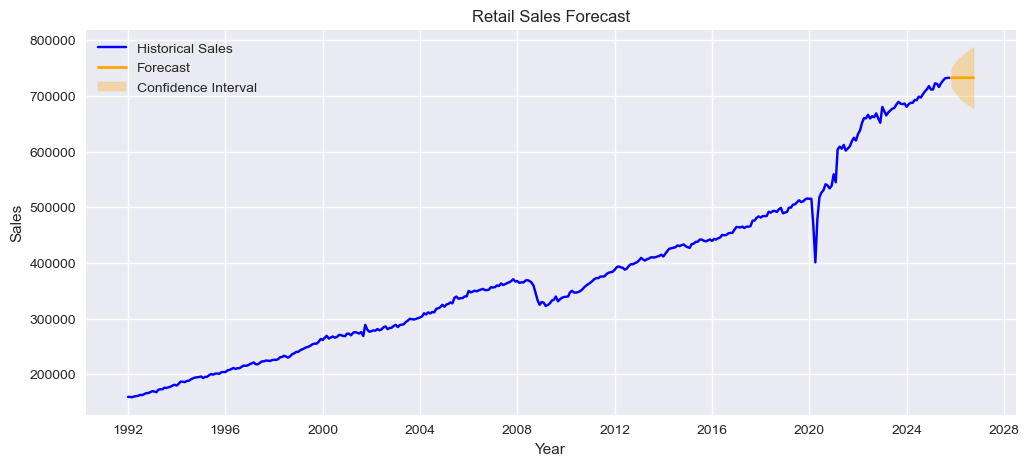

In [85]:
# =========================
# Forecast Visualization
# =========================

plt.figure(figsize=(12, 5))
plt.plot(df.index, df["sales"], label="Historical Sales", color="blue")
plt.plot(forecast_df.index, forecast_df["mean"], label="Forecast", color="orange", linewidth=2)
plt.fill_between(
    forecast_df.index,
    forecast_df["mean_ci_lower"],
    forecast_df["mean_ci_upper"],
    color="orange", alpha=0.3, label="Confidence Interval"
)

plt.title("Retail Sales Forecast")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.legend()
plt.show()

## Observation

The forecast shows steady growth in retail sales continuing beyond 2025, following the long-term upward trend seen since 1992. After the sharp COVID dip and strong recovery, the model predicts stable increases ahead. The orange confidence band is narrow in the near term but widens slightly further out, reflecting growing uncertainty. Overall, this suggests positive demand for the coming years, giving confidence for planning inventory and staffing—though it's wise to stay flexible for unexpected changes.

## Business Recommendations and Key Takeaways

---

U.S. retail sales show a strong **long-term upward trend**, with steady growth continuing after the COVID recovery. The ARIMA forecast predicts **stable increases into 2026 and beyond**, supporting confident planning.  

**Recommended actions:**
- **Inventory:** Plan for moderate growth; keep 10-15% extra stock as a buffer for surprises.
- **Promotions:** Target high-growth areas like online sales and seasonal peaks.
- **Staffing:** Gradually add staff, focusing on e-commerce and customer service.
- **Monitoring:** Watch economic indicators closely and stay flexible.

**Key Takeaway**: Retail demand looks positive and growing. Use this forecast to guide expansion and budgeting, while building in some caution to handle any unexpected changes smoothly.